In [1]:
import requests
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df_global_data = pd.read_csv("/Users/simonponce/Desktop/Global_Data_Jobs/clean.csv")



In [13]:
df_global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21302 entries, 0 to 21301
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           21302 non-null  datetime64[ns]
 1   experience_level    21302 non-null  object        
 2   employment_type     21302 non-null  object        
 3   job_title           21302 non-null  object        
 4   salary              21302 non-null  int64         
 5   salary_currency     21302 non-null  object        
 6   salary_in_usd       21302 non-null  int64         
 7   employee_residence  21302 non-null  object        
 8   work_setting        21302 non-null  object        
 9   company_location    21302 non-null  object        
 10  company_size        21302 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 1.8+ MB


In [11]:
df_global_data['work_year'] = pd.to_datetime(df_global_data['work_year'], format='%Y')

In [37]:
df_global_data


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2024-01-01,Entry-level,Full-time,Data Analyst,20000,USD,20000,India,Remote,India,M
1,2024-01-01,Entry-level,Full-time,Data Reporting Analyst,58000,USD,58000,United States,In-person,United States,M
2,2024-01-01,Entry-level,Full-time,Data Reporting Analyst,42000,USD,42000,United States,In-person,United States,M
3,2024-01-01,Senior,Full-time,Data Manager,169680,USD,169680,United States,Remote,United States,M
4,2024-01-01,Senior,Full-time,Data Manager,113120,USD,113120,United States,Remote,United States,M
...,...,...,...,...,...,...,...,...,...,...,...
21297,2021-01-01,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L
21298,2020-01-01,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L
21299,2021-01-01,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L
21300,2020-01-01,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S


In [ ]:
#What is the most common work environmment (office, remote, hybrid)?
#Are there trends over time with work_setting?
#What is the distribution of salaries across different categories like 'employment_type' or company_size
#Are these salary discrepancies based on cetain factor? (box plots)
#What are the top N countries for Availabilitg of data jobs? 
#Average Salary by Location.
##time_setting = df_global_data.groupby(['work_year' , 'work_setting']).size().reset_index(name="setting")
time_setting = df_global_data= {'work_year': [ 2020, 2021, 2022 ],
        'work_setting': ['In_person', 'Remote', 'Hybrid']}
time_setting= pd.DataFrame(df_global_data)
##time_setting.plot(figsize=(20,10), linewidth=2 , fontsize=20 ,title='Work Setting Over Time')
time_setting.plot(kind='bar', x='work_year', y='work_setting', figsize=(20,10), color='#800080')

#ork_setting = df_global_data[df_global_data['work_setting']]
##time_frame = df_global_data[df_global_data['work_year']]
 
#work_setting = df_global_data['work_setting', 'work_year'].value_counts()
#work_setting.sort_values(ascending=True).plot(kind='barh', figsize=(20,10), color='#800080')

In [ ]:
# Convert the 'work_year' column to numeric
df_global_data['work_year'] = pd.to_numeric(df_global_data['work_year'])

# Convert the dictionary to a DataFrame
df_global_data = pd.DataFrame(df_global_data)
df_global_data.plot()

# Plotting a bar chart
#df_global_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#800080', '#FFA500', '#008000'])

In [ ]:
df_global_data.columns

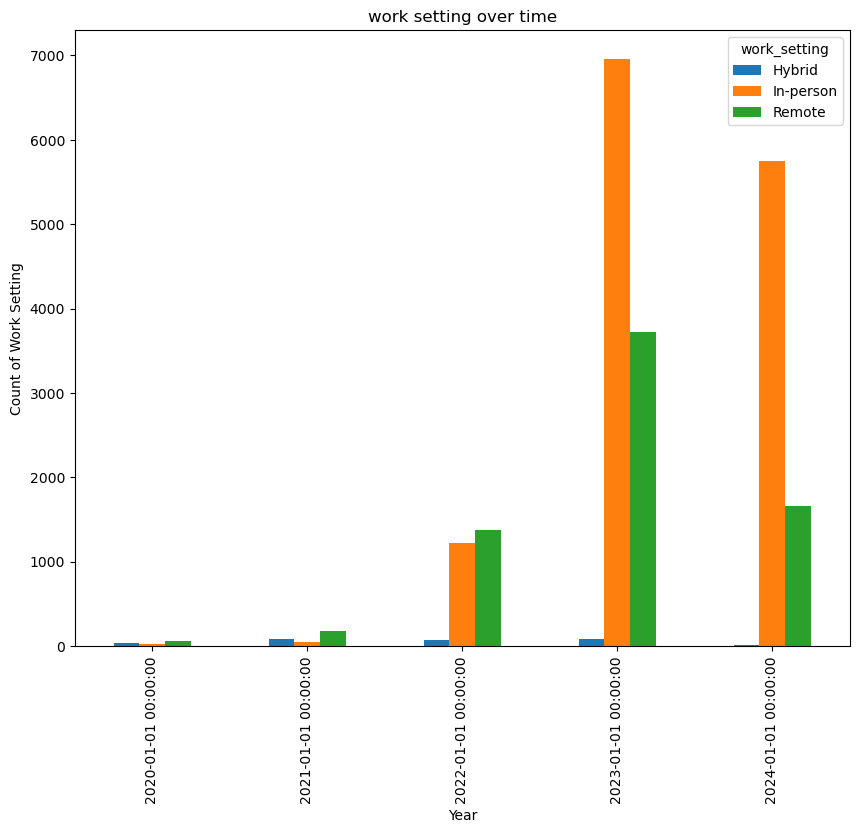

In [66]:
#work_setting.sort_values(by='work_setting', ascending=True).plot(kind='bar', figsize=(30, 20),   color='#800080')
#work_setting = df_global_data[df_global_data['work_setting'] == 'Remote', 'Hybrid', 'In-person']

#df_global_data[df_global_data['work_setting'].isin(['Remote', 'Hybrid', 'In-person'])]
work_settings =df_global_data.groupby(['work_year','work_setting']).size().unstack()
work_settings.plot(kind= "bar", figsize=(10, 8))
#df_global_data.plot(df_global_data['work_setting'].size().unstack(),df_global_data['work_year'],kind='bar', figsize=(10, 8))
plt.xlabel("Year")
plt.ylabel("Count of Work Setting")
plt.title("work setting over time")
plt.show()
#work_settings['work_setting'].value_counts().plot(kind='bar', figsize=(10, 8), color='#800080')
#time_setting = work_setting['work_year'].value_counts().head(10)


In [65]:


x= work_settings.groupby(['work_year', 'work_setting']).size()

y= df_global_data['work_year'].value_counts().sort_index()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(x , y, color ='maroon', 
        width = 0.4)

plt.xlabel("work_setting")
plt.ylabel("year")
plt.title("work_arangement over time")
plt.show()

KeyError: 'work_setting'

In [62]:
#work_setting = df_global_data[df_global_data['work_setting'] == 'Remote']

#time_setting.sort_values(ascending=True).plot(kind='bar', figsize=(10, 8), color='#800080')
#work_setting.sort_values(ascending=True).plot(kind='bar', figsize=(20,10), color='#800080')

work_setting.sort_values(by= 'work_setting', ascending=False).plot(kind='bar', figsize=(30, 20),   color='#800080')
#work_setting = df_global_data[df_global_data['work_setting'] == 'Remote', 'Hybrid', 'In-person']
time_setting = work_setting['work_setting'].value_counts().head(10)
work_settings = df_global_data[df_global_data['work_setting'].isin(['Remote', 'Hybrid', 'In-person'])]

# Plot separate bars for each work setting
work_settings['work_setting'].value_counts().plot(kind='bar', figsize=(10, 8), color='#800080')






NameError: name 'work_setting' is not defined

In [ ]:
work_setting = df_global_data[df_global_data['work_setting'] == 'Remote', 'Hybrid', 'In-person']
time_setting = work_setting['work_year'].value_counts().head(10)

# Plot the data
ax = time_setting.sort_values(ascending=True).plot(kind='bar', figsize=(20, 10), color='#800080')

# Set the x-axis labels
ax.set_xticklabels(time_setting.index, rotation=45)

plt.show()

In [ ]:
work_setting.sort_values(ascending=True).plot(kind='bar', figsize=(20,10), color='#800080')


In [ ]:
df_global_data.plot(figsize=(20,10), linewidth=2 , fontsize=20)
plt.xlabel('Year', fontsize=20)
